# PREDICTION OF JOBLOSS USING THE SVM 

### In machine learning, support-vector machines are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis.
### in our case we are going to use it in order to predict the jobloss status 

## Data Loading phase

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import io

%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [11]:
XXX = pd.read_csv('DimPatientCoded.csv')
XXX.head()

,Unnamed: 0,Date Announced,Age Bracket,Age,Gender,Detected State,PovertyRate,Current Status,Type of trans,Nationality,Symptoms,JobLoss,FinancialSituation,Diseases,Profession,CovidAfterVaccin,Vaccinated,Reason
0,0,1/30/2020,0,1.0,0,16,7.05,1,1,India,1,2,1,4,1,0,1,0.0
1,1,2/2/2020,0,1.0,1,16,7.05,1,1,India,5,0,0,4,2,1,1,0.0
2,2,2/3/2020,0,1.0,1,16,7.05,1,1,India,1,2,1,4,1,0,1,0.0
3,3,3/2/2020,0,1.0,1,8,9.91,1,1,India,2,2,0,2,1,0,0,2.0
4,4,3/2/2020,0,1.0,1,31,13.74,1,1,India,2,0,1,4,2,0,0,4.0


### Choosing the Exact variables that we might need

In [12]:
XX =  XXX[['Age','Gender','Current Status','JobLoss','FinancialSituation','Detected State','Diseases','Profession','Vaccinated','Type of trans']]
dataset = XX.replace(np.nan,0)
dataset

,Age,Gender,Current Status,JobLoss,FinancialSituation,Detected State,Diseases,Profession,Vaccinated,Type of trans
0,1.0,0,1,2,1,16,4,1,1,1
1,1.0,1,1,0,0,16,4,2,1,1
2,1.0,1,1,2,1,16,4,1,1,1
3,1.0,1,1,2,0,8,2,1,0,1
4,1.0,1,1,0,1,31,4,2,0,1
...,...,...,...,...,...,...,...,...,...,...
247231,1.0,1,1,2,0,15,4,1,1,0
247232,1.0,1,1,2,0,15,2,1,0,0
247233,1.0,1,1,0,1,15,2,2,0,0
247234,1.0,1,1,0,1,15,2,2,1,0


## Data Description Phase

In [13]:
XX.shape

(247236, 10)

In [14]:
XX.isna().sum()

Age                   0
Gender                0
Current Status        0
JobLoss               0
FinancialSituation    0
Detected State        0
Diseases              0
Profession            0
Vaccinated            0
Type of trans         0
dtype: int64

# Graph - two-by-two crossing of variables

## In order to detect and comprehend the relation between the variables and the predicted value

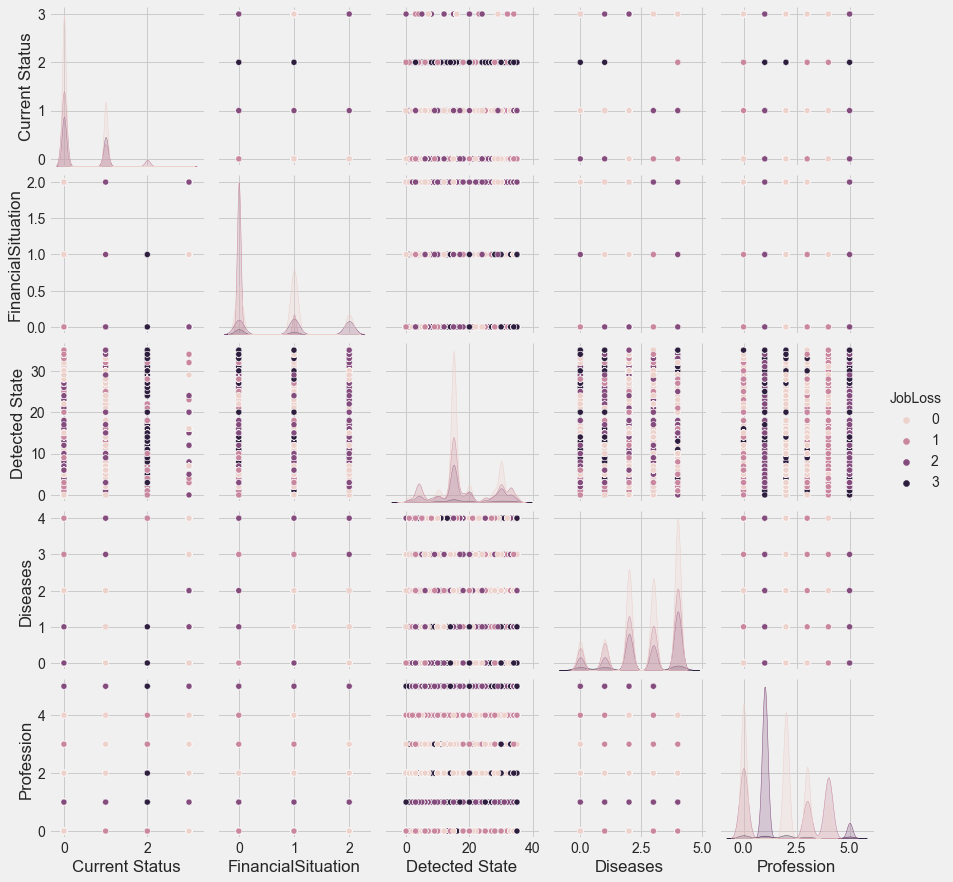

In [11]:
import seaborn as sns
sns.pairplot(XX, hue="JobLoss")

## graph - two-by-two crossing of variables
## Create Correlation matrix

In order to detect the most correlated Variables to Jobloss

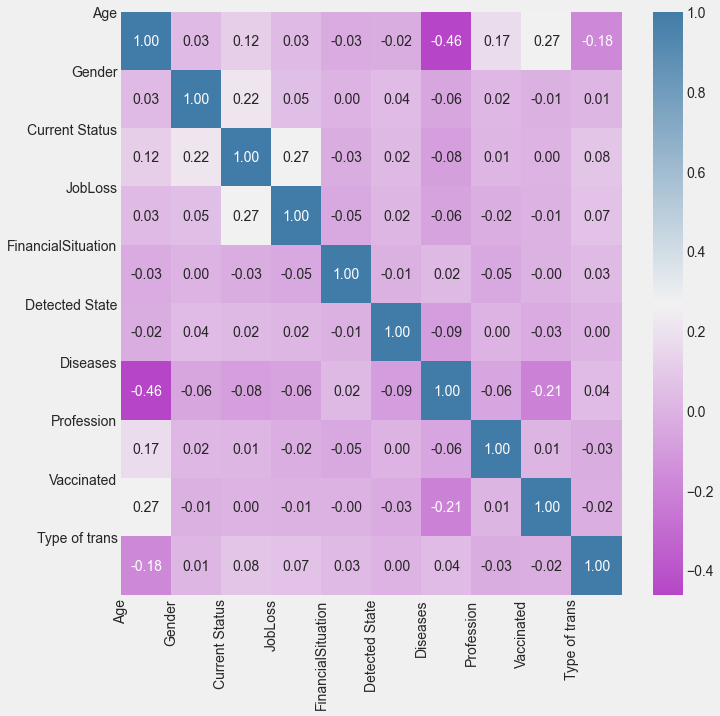

In [18]:
corr = XX.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10,10))
#Generate Color Map
colormap = sns.diverging_palette(300, 600, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [19]:
dt =  XXX[['JobLoss','Current Status','FinancialSituation','Gender']]
dataset = dt.replace(np.nan,0)
dataset

,JobLoss,Current Status,FinancialSituation,Gender
0,2,1,1,0
1,0,1,0,1
2,2,1,1,1
3,2,1,0,1
4,0,1,1,1
...,...,...,...,...
247231,2,1,0,1
247232,2,1,0,1
247233,0,1,1,1
247234,0,1,1,1


# Prediction algorythm SVM

## Deviding our data intro traininf and testing sets

In [20]:
# diviser les données en attributs et étiquettes (labes)
X = dt.drop("JobLoss", axis=1)
y = dt["JobLoss"]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [22]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)


SVC()

In [23]:
from sklearn.metrics import classification_report
y_pred_svc_1 = svm.predict(X_test)
print(classification_report(y_pred_svc_1, y_test))

              precision    recall  f1-score   support

           0       0.59      0.66      0.62     20232
           1       0.84      0.52      0.64     24346
           2       0.13      0.53      0.21      2523
           3       1.00      0.61      0.76      2347

    accuracy                           0.58     49448
   macro avg       0.64      0.58      0.56     49448
weighted avg       0.71      0.58      0.62     49448



### Linear Kernel


In [28]:
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred_svc_2 = svm.predict(X_test)
print(classification_report(y_pred_svc_2, y_test))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64     22744
           1       0.84      0.52      0.64     24226
           2       0.00      0.00      0.00         0
           3       1.00      0.61      0.76      2478

    accuracy                           0.58     49448
   macro avg       0.62      0.44      0.51     49448
weighted avg       0.76      0.58      0.65     49448



### Kernel polynomial

In [29]:
# Kernel poly
svm = SVC(kernel="poly")
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred_svc_3 = svm.predict(X_test)
print(classification_report(y_pred_svc_3, y_test))

              precision    recall  f1-score   support

           0       0.60      0.66      0.63     20393
           1       0.84      0.52      0.64     24259
           2       0.13      0.55      0.21      2357
           3       1.00      0.62      0.77      2439

    accuracy                           0.59     49448
   macro avg       0.64      0.59      0.56     49448
weighted avg       0.71      0.59      0.62     49448



### Kernel sigmoid

In [30]:

svm = SVC(kernel="sigmoid")
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred_svc_4 = svm.predict(X_test)
print(classification_report(y_pred_svc_4, y_test))

              precision    recall  f1-score   support

           0       0.75      0.56      0.64     30195
           1       0.64      0.55      0.59     17405
           2       0.00      0.00      0.00      1493
           3       0.07      0.30      0.11       355

    accuracy                           0.54     49448
   macro avg       0.36      0.35      0.34     49448
weighted avg       0.68      0.54      0.60     49448



### Kernel rbf (defaut)

In [31]:
svm = SVC(kernel="rbf")
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred = svm.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.60      0.66      0.63     20420
           1       0.84      0.52      0.64     24149
           2       0.13      0.55      0.21      2440
           3       1.00      0.62      0.77      2439

    accuracy                           0.59     49448
   macro avg       0.64      0.59      0.56     49448
weighted avg       0.71      0.59      0.62     49448



## RESULTS COMPARISON 

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
s1=accuracy_score(y_test, y_pred_svc_1)
s2=accuracy_score(y_test, y_pred_svc_2)
s3=accuracy_score(y_test, y_pred_svc_3)
s4=accuracy_score(y_test, y_pred_svc_4)

models = pd.DataFrame({
    'Model': ['Support Vector Machines RBF', 'Support Vector Machines Linaire','Support Vector Machines polynomiale',
              'Support Vector Machines sigmoïde'],
    'Score': [s1,s2, s3, 
              s4]})
models.sort_values(by="Score",ascending=False)

NameError: name 'y_pred_svc_2' is not defined

In [ ]:
print("Meilleurs paramétres trouvés par GridSeachCV")
print(grid.best_params_)

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_svc_1) 
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred_svc_2) 
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, threshold3 = roc_curve(y_test, y_pred_svc_3)
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, threshold4 = roc_curve(y_test, y_pred_svc_4) 
roc_auc4 = auc(fpr4, tpr4)
plt.figure(figsize=(7,7)) 
plt.plot(fpr1, tpr1, color='yellow', lw=2, label='Support Vector Machine (area = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='red', lw=2, label='Random Forest ROC curve (area = %0.2f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='cyan', lw=2, label='kNN ROC curve (area = %0.2f)'% roc_auc3)
plt.plot(fpr4, tpr4, color='magenta', lw=2, label='Naive Bayes (area = %0.2f)'% roc_auc4)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()